<center><img src="./Images/car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python

In [12]:
# Import required modules
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

def quantify_conf_matrix(conf_matrix):
    # Extract TN, TP, FN and FP from conf_matrix
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]

    # Calculate and print the accuracy
    accuracy = (TN + TP) / (TN + FN + FP + TP)

    # Calculate and print the sensitivity
    sensitivity = TP / (TP + FN)

    # Calculate and print the specificity
    specificity = TN / (TN + FP)

    return accuracy

insurance = pd.read_csv('./Dataset/car_insurance.csv')
insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


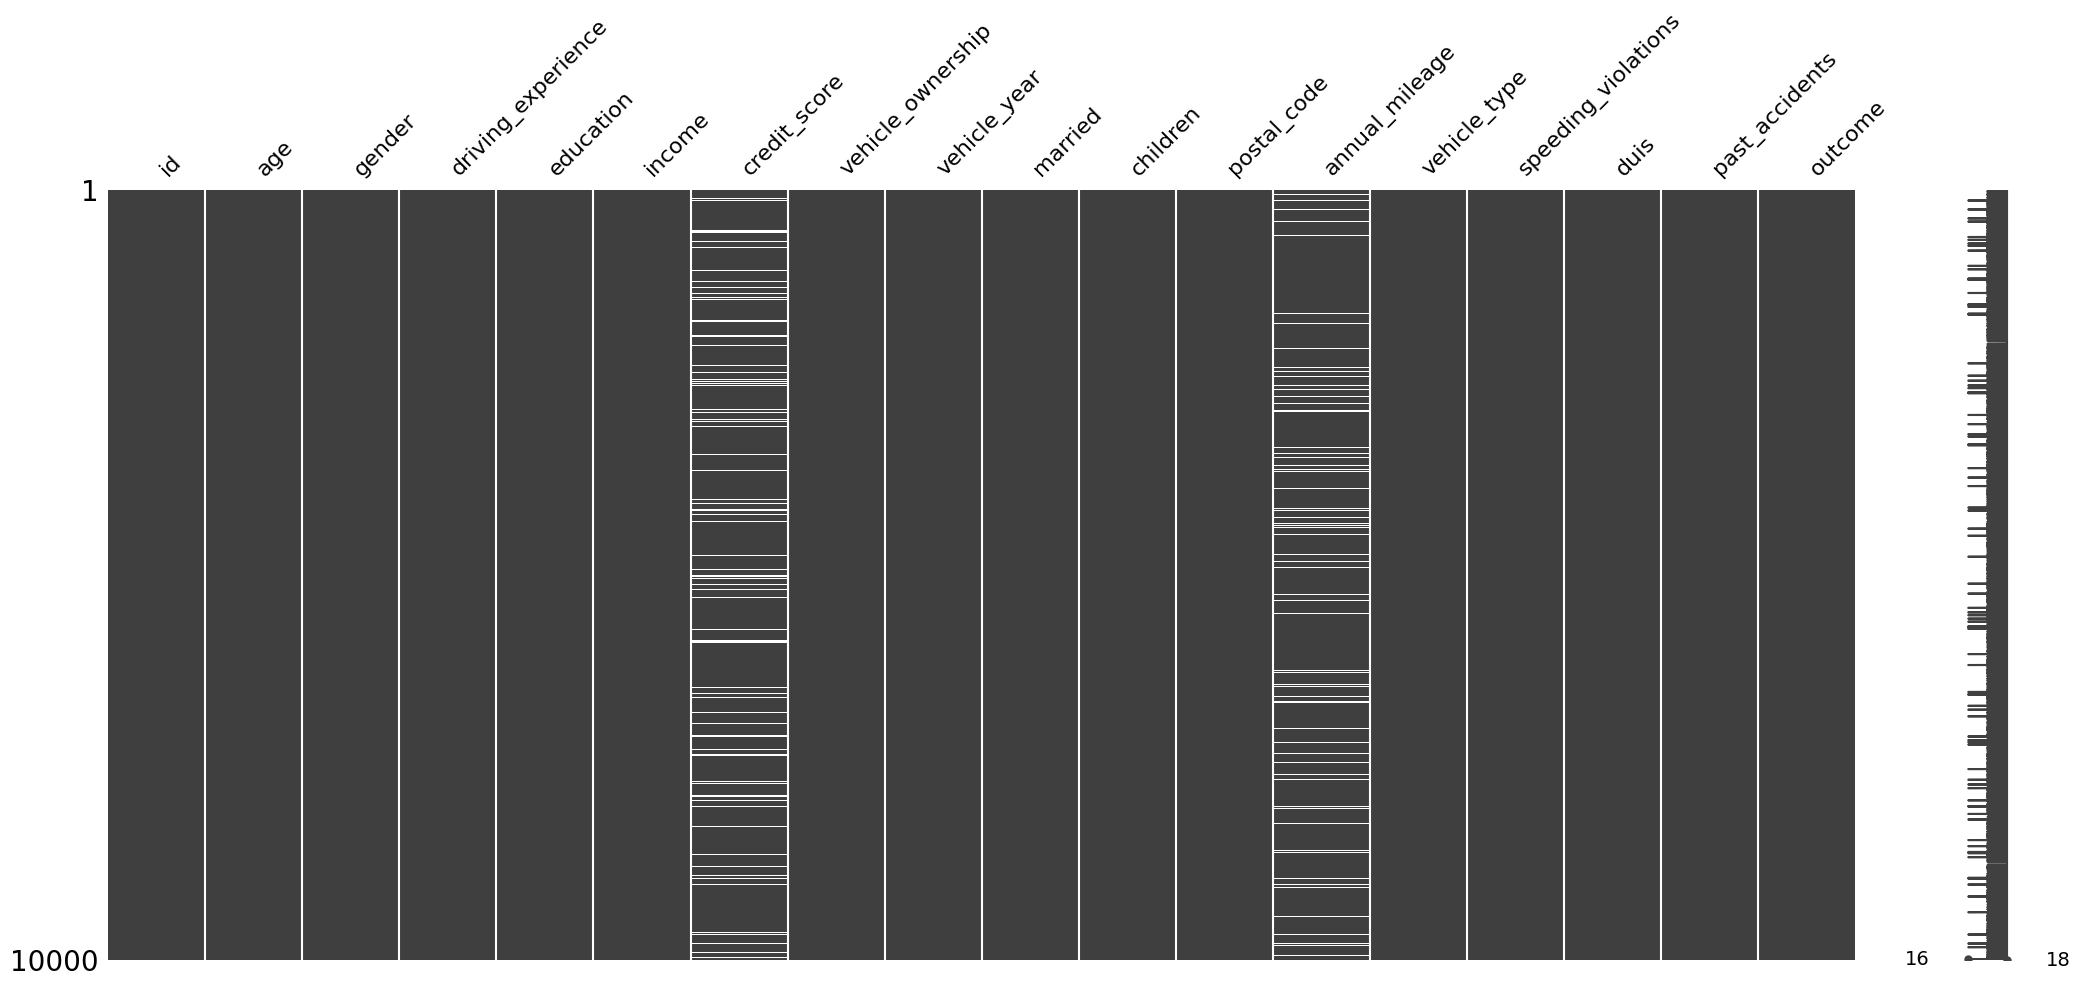

In [3]:
nan_percent = insurance['credit_score'].isna().sum()/len(insurance)*100
#Note: NaN value is under 10%
insurance['credit_score'].describe()
msno.matrix(insurance)
plt.show()


I don't see any dependence between NaN values and other columns and being that the missing values are under 10% we'll replace them with the mean of the specific column

In [4]:
missing = insurance[insurance['credit_score'].isna()]
complete = insurance[~insurance['credit_score'].isna()]

In [5]:
insurance_drop = insurance.dropna()

insurance['credit_score'] = insurance['credit_score'].fillna(insurance['credit_score'].mean())
insurance['annual_mileage'] = insurance['annual_mileage'].fillna(insurance['annual_mileage'].mean())

Testing between Age and Outcome

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Intercept    0.673040
age         -1.135579
dtype: float64
   age   outcome  most_likely_outcome
0    0  0.662184                  1.0
1    1  0.386384                  0.0
2    2  0.168245                  0.0
3    3  0.061014                  0.0
4    4  0.020447                  0.0


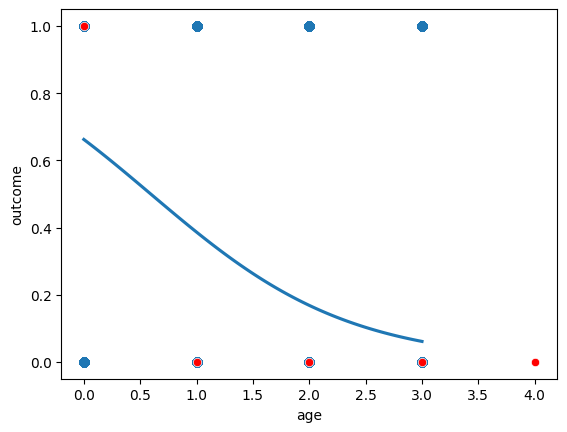

In [6]:
explanatory_data = pd.DataFrame(
    {'age': np.arange(0,5,1)}
)

model_outcome_vs_age = logit('outcome  ~ age', data=insurance).fit()

print(model_outcome_vs_age.params)

prediction_data = explanatory_data.assign(
    outcome = model_outcome_vs_age.predict(explanatory_data)
)
prediction_data["most_likely_outcome"] = np.round(prediction_data["outcome"])
# Print the head
print(prediction_data.head())

# Create a scatter plot with logistic trend line
sns.regplot(x="age",
            y="outcome",
            data=insurance,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="age",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

plt.show()

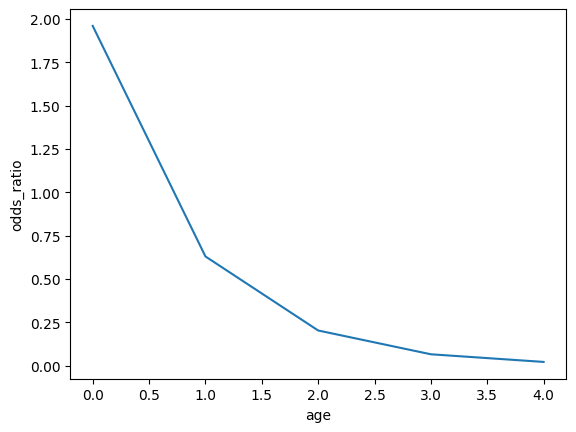

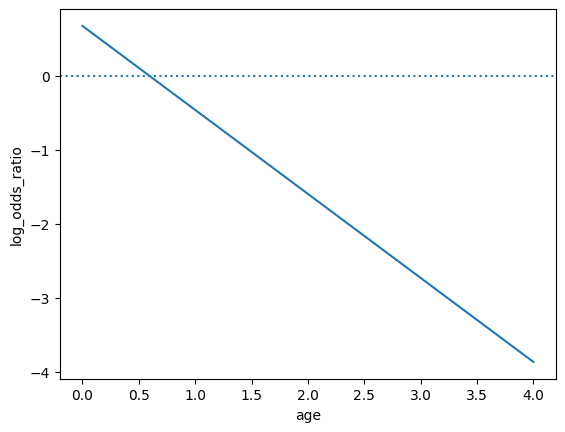

In [7]:
prediction_data["odds_ratio"] = prediction_data["outcome"]/(1-prediction_data["outcome"])
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

sns.lineplot(data = prediction_data, y='odds_ratio', x='age')
plt.show()

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="age",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

accuracy:  0.7747
sensitivity:  0.46217682732205556
specificity:  0.9172855686617154


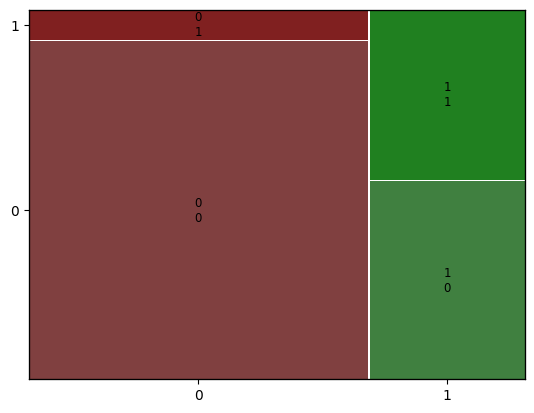

In [8]:
from statsmodels.graphics.mosaicplot import mosaic

actual_response = insurance['outcome']
predicted_response = np.round(model_outcome_vs_age.predict(insurance))

outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

conf_matrix = model_outcome_vs_age.pred_table()

quantify_conf_matrix(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [33]:
insurance_col = insurance.drop(columns=['id', 'outcome']).columns

accuracy_dict = {}

for col in insurance_col:
    model = logit(f'outcome ~ {col}', data=insurance).fit()
    accuracy_dict[col] = quantify_conf_matrix(model.pred_table())


Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567469
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [36]:
best_feature = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_feature]

In [38]:
best_feature_df = pd.DataFrame({
    'best_feature': [best_feature],
    'best_accuracy': [best_accuracy]
})

best_feature_df


,best_feature,best_accuracy
0,driving_experience,0.7771
